In [1]:
import keras
import pandas as pd
import numpy as np
from glob import glob                                # Parcourir dossier de dataset
import matplotlib.pyplot as plt
import cv2                                           # traitement des images du dataset
from keras.datasets import mnist                     # Importe le dataset de mnist
from keras.utils import to_categorical               # pour modifier les labels
from keras.models import Sequential, load_model      # type de modele
from keras.layers import Dense, Flatten              # Fully Connected Layers
from keras.layers import Conv2D, MaxPooling2D        # Convolutional layers + Maxpooling layers
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy    # Loss function

from keras.callbacks import TensorBoard

import h5py                                          # Pour pouvoir enregistrer son modele en .h5

Using TensorFlow backend.


# Detection of handwritten digits with MNIST

MNIST est un exemple très souvent utilisé pour commencer avec les CNN, son dataset existe sur keras et peut être directement importé avec la fonction **load_data( )**

Note :
- Le dataset de MNIST a 60 000 exemples d'entrainement et 10 000 exemples de training
- Le format de chaque image est de 28x28 pixels


## STEP 1 : Load data

In [2]:
# Les données sont déjà séparées en training set et testing set sur keras

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Vous pouvez voir à quoi ressemble votre dataset avec un print. A noter que votre x_train est une liste [ ] de 60 000 exemples et que votre x_test est une liste de 10 000 exemples

- Chaque exemple se compose de 28 listes de 28 valeurs (car 28x28 pixels), il y a donc 28x28 = 784 valeurs, une par pixel
- Chaque pixel a une valeur comprise entre 0 et 255, car un int = 8 octets donc 2^8 = 256 valeurs possibles, mais on commence à zéro donc 0-255
- Les labels sont une valeur unique comprise entre 0 et 9 et correspondent au digit de l'image en question

Vous pouvez verifier la shape de votre dataset (x_train, x_test, y_train et y_test)

## STEP 2 : Prepare Data


Ensuite, une fois les données importées, nous devons les préparer afin qu'elles puissent être données à notre modèle

Dans un premier temps, nous allons ajouter une dimension à la fin de nos x_train et x_test pour préciser le nombre de canaux que nous utiliserons.

- 1 pour Noir et Blanc
- 3 pour RGB
- L pour nuances de gris

Pour cet exemple, nous nous contenterons d'une image en N&B, donc la valeur de notre dimension supplémentaire sera égale à 1

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # x_train.shape[0] = 60 000, 1 pour B&W
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) # x_test.shape[0] = 10 000, 1 pour B&W

# Verifier qu'une dimension a bien été ajoutée et que sa valeur = 1

print ('x_train shape :', x_train.shape)
print (x_train.shape[0], "train samples")
print (x_test.shape[0], "test samples")

x_train shape : (60000, 28, 28, 1)
60000 train samples
10000 test samples


Essayez de print un exemple du x_train pour voir à quoi cela ressemble

In [4]:
print(x_train[8])
print('label x_train[8] =', y_train[8])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


Ensuite, nous allons normaliser notre dataset afin que les valeurs de nos pixels soient comprises entre 0 et 1 plutôt qu'entre 0 et 255. Cela facilitera les calculs pour la machine.

Pour se faire, il faudra d'abord "recaster" nos variables *x_train* et *x_test* en tant que float.

In [5]:
# Recast

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize

x_train /= 255
x_test /= 255

In [6]:
print(x_train[8])
print('label x_train[8] =', y_train[8])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

Maintenant qu'on a bien modifié nos training et testing sets, il nous reste à modifier nos labels de façon à ce que la machine puisse mieux les comprendre.

Pour l'instant, notre y_train est une liste de 60 000 valeurs entre 0 et 9, qui sont les labels des images correspondantes. 

*y_train[8] = label de la 9ème image de notre dataset, x_train[8]*

Plutôt que d'avoir un label qui soit une valeur comprise entre 0 et 9, on va préférer avoir un label qui a la forme d'un one-hot vecteur. C'est à dire un vecteur composé de 10 valeurs (0 ou 1), avec un 1 a la position correspondante au label, et des 0 partout ailleurs.

*Exemple : on veut transformer un* **y_train[8] = 1** en **y_train[8] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]**

On va utiliser une fonction de keras appelée **to_categorical(a, b)** qui prend en paramètre :
- a = la liste qu'on cherche à changer
- b = le nombre de sorties que nous avons

Note : Cette fonction saura automatiquement où placer le 1 dans votre vecteur. Vous devez donc juste lui donner le nombre de catégories possibles que notre modèle pourra avoir.

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
print('label x_train[8] =', y_train[10:20])
print(x_train.shape)

label x_train[8] = [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(60000, 28, 28, 1)


## STEP 3 : Create Model

Maintenant que nos données sont prêtes, nous allons pouvoir créer notre modèle. Keras a énormément de fonctions qui nous permettent d'éviter d'avoir à recoder nos fonctions de loss ou de backpropagation, pour l'objectif de cet exercice, nous allons donc les utiliser :)

Nous allons commencer par définir une variable en tant que modèle en utilisant la méthode Sequential de keras. Utiliser cette méthode nous facilitera le travail pour ajouter nos couches et train notre modèle. Pour plus d'infos vous pouvez checker la doc

https://keras.io/models/sequential/

Maintenant que nous avons notre modèle, nous pouvons y ajouter les couches donc nous avons besoin. Rappelez vous l'ordre des couches (D'abord les couches de conv, puis les couches de Maxpool, puis les Fully Connected)

Pour ajouter une couche, vous pouvez utiliser la fonction **.add( )**

Attention : Pour la première couche, n'oubliez pas qu'il faut préciser l'*input_shape*

Voici la doc qui vous aidera à utiliser votre model Sequential https://keras.io/getting-started/sequential-model-guide/

Vous pouvez utiliser la fonction **.summary( )** pour voir les détails de vos couches

In [9]:
# Define model
model = Sequential()

# Ajouter les couches de convolution
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))

# Ajouter les couches de MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Alterner entre couche de convolution et maxpooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Applatir le dataset en un seul array
model.add(Flatten())

# Ajouter les couches Fully Connected
model.add(Dense(256, activation='relu'))

# Ajouter la dernière couche FC, mais avec cette fois le nombre de sorties au lieu du nombre de neurones
model.add(Dense(10, activation='softmax'))

# Compilation du modèle avant l'entrainement
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flat

## STEP 4 : Train Model and save it

Nous devons maintenant entrainer notre modèle afin de voir ses performances. Pour cela, vous pouvez utiliser la fonction **.fit( )** qui prend en paramètres :
- x_train
- y_train,
- votre taille de batch
- votre nombre d'epochs
- votre proportion de validation

In [10]:
# Pour ceux qui veulent approfondir, vous pouvez checker l'utilisation de tensorboard
tbd = TensorBoard(
    log_dir='tensorboard', histogram_freq=0,
    write_graph=True, write_images=True
)

# Entrainement du modèle
h = model.fit(x_train, y_train, batch_size=128, verbose=1, epochs=10, validation_split=0.2, callbacks=[tbd])
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

# Save le modèle
model.save("cnn_maxime.h5")

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.1978 - acc: 0.9372 - val_loss: 0.0567 - val_acc: 0.9840
Epoch 2/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.0464 - acc: 0.9857 - val_loss: 0.0479 - val_acc: 0.9864
Epoch 3/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.0359 - val_acc: 0.9895
Epoch 4/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.0229 - acc: 0.9927 - val_loss: 0.0479 - val_acc: 0.9855
Epoch 5/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.0180 - acc: 0.9944 - val_loss: 0.0357 - val_acc: 0.9902
Epoch 6/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0351 - val_acc: 0.9906
Epoch 7/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0

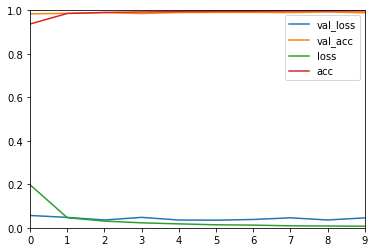

In [11]:
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

## STEP 5 : Testing our model

Maintenant que nous avons un modèle, nous allons pouvoir le tester. Pour cela, nous allons créer nos propres images de digits en blanc sur noir en allant sur ce site : https://www.piskelapp.com/
- Cliquer sur *Create Sprite* en haut à droite
- Dans les paramètres, resize l'image à 28x28
- Dessinez le digit que vous voulez tester (n'hésitez pas à en faire plusieurs)
- Exportez votre image (icone de la montagne)
- Vérifiez que vous êtes bien sous l'onglet PNG, et cliquez sur *Download Selected frame export*

Ensuite, une fois toutes vos images téléchargées, renommez les avec leur label correspondant (ce sera plus simple de vérifier le résultat), ex : image de 0 sera nommée 0.png
  
Mettez toutes vos images dans le même dossier que votre jupyter notebook

Pour aller chercher les images à tester, nous allons utiliser un module appelé **glob** qui se situe déjà dans vos imports.
  
Il faudra ensuite faire les mêmes modifications que nous avons faites à notre dataset dans le *STEP 2 : Prepare dataset* (reshape, normalize)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

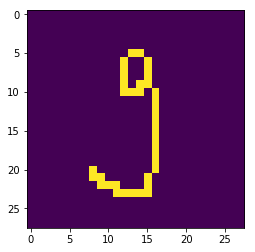

In [12]:
import cv2

# Recupérer toutes nos images
all_images = glob('*.png')

model = load_model('cnn_maxime.h5')

model.summary()

# Loop in all_images to process each image
for image in all_images :
    # Open the image using PLT Image.open
    img = cv2.imread(image, 0)
    
    # Print the image to see
    plt.imshow(img)
    
    # Reshape the image, adding one dimension at the end
    img = img.reshape(1, 28, 28, 1)
    
    # Recast and normalize
    img = img.astype('float32')
    img /= 255
    
    # Get prediction
    prediction = model.predict(img)
    # Get highest value index
    
    prediction = np.argmax(prediction)
    
    print(image, 'prediction is :', prediction)